## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  92.845169  1375.153653  0.151880   6.680935  1.197788
1  11.880823  1653.678589  0.758141   9.667559  1.430902
2  24.647229   952.059691  0.561079  10.307617  1.475989
3  24.971560  1560.307442  0.686886   1.447804  1.556147
4  85.416833  1583.886605  0.848466   9.002805  1.630082


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0355296	total: 66.4ms	remaining: 1m 6s
1:	learn: 1.0275930	total: 67ms	remaining: 33.4s
2:	learn: 1.0190068	total: 67.6ms	remaining: 22.5s
3:	learn: 1.0101890	total: 68.2ms	remaining: 17s
4:	learn: 1.0041961	total: 68.8ms	remaining: 13.7s
5:	learn: 0.9956988	total: 69.4ms	remaining: 11.5s
6:	learn: 0.9875458	total: 69.9ms	remaining: 9.91s
7:	learn: 0.9787712	total: 70.5ms	remaining: 8.74s
8:	learn: 0.9709003	total: 71ms	remaining: 7.82s
9:	learn: 0.9611091	total: 71.5ms	remaining: 7.08s
10:	learn: 0.9536635	total: 72.1ms	remaining: 6.48s
11:	learn: 0.9472585	total: 72.5ms	remaining: 5.97s
12:	learn: 0.9387251	total: 73ms	remaining: 5.54s
13:	learn: 0.9323725	total: 73.4ms	remaining: 5.17s
14:	learn: 0.9257800	total: 73.9ms	remaining: 4.85s
15:	learn: 0.9188794	total: 74.3ms	remaining: 4.57s
16:	learn: 0.9113899	total: 74.8ms	remaining: 4.33s
17:	learn: 0.9032771	total: 75.3ms	remaining: 4.11s
18:	learn: 0.8980067	total: 75.8ms	remaining: 3.91s


112:	learn: 0.4911425	total: 118ms	remaining: 926ms
113:	learn: 0.4884030	total: 119ms	remaining: 921ms
114:	learn: 0.4853048	total: 119ms	remaining: 915ms
115:	learn: 0.4828563	total: 119ms	remaining: 909ms
116:	learn: 0.4799899	total: 120ms	remaining: 905ms
117:	learn: 0.4775648	total: 120ms	remaining: 899ms
118:	learn: 0.4751102	total: 121ms	remaining: 893ms
119:	learn: 0.4715569	total: 121ms	remaining: 889ms
120:	learn: 0.4688073	total: 122ms	remaining: 884ms
121:	learn: 0.4666314	total: 122ms	remaining: 879ms
122:	learn: 0.4637200	total: 123ms	remaining: 875ms
123:	learn: 0.4608345	total: 123ms	remaining: 870ms
124:	learn: 0.4582571	total: 124ms	remaining: 865ms
125:	learn: 0.4565804	total: 124ms	remaining: 860ms
126:	learn: 0.4544010	total: 124ms	remaining: 854ms
127:	learn: 0.4517336	total: 125ms	remaining: 850ms
128:	learn: 0.4493373	total: 125ms	remaining: 846ms
129:	learn: 0.4468185	total: 126ms	remaining: 841ms
130:	learn: 0.4446202	total: 126ms	remaining: 837ms
131:	learn: 

266:	learn: 0.2605510	total: 186ms	remaining: 511ms
267:	learn: 0.2596939	total: 187ms	remaining: 510ms
268:	learn: 0.2587940	total: 187ms	remaining: 509ms
269:	learn: 0.2582471	total: 188ms	remaining: 507ms
270:	learn: 0.2575414	total: 188ms	remaining: 506ms
271:	learn: 0.2567321	total: 188ms	remaining: 504ms
272:	learn: 0.2559202	total: 189ms	remaining: 503ms
273:	learn: 0.2553732	total: 189ms	remaining: 501ms
274:	learn: 0.2548874	total: 190ms	remaining: 500ms
275:	learn: 0.2543725	total: 190ms	remaining: 499ms
276:	learn: 0.2537130	total: 191ms	remaining: 498ms
277:	learn: 0.2531910	total: 191ms	remaining: 497ms
278:	learn: 0.2527995	total: 192ms	remaining: 495ms
279:	learn: 0.2521793	total: 192ms	remaining: 494ms
280:	learn: 0.2518707	total: 193ms	remaining: 493ms
281:	learn: 0.2500750	total: 193ms	remaining: 492ms
282:	learn: 0.2492709	total: 194ms	remaining: 491ms
283:	learn: 0.2489079	total: 194ms	remaining: 490ms
284:	learn: 0.2473609	total: 195ms	remaining: 489ms
285:	learn: 

514:	learn: 0.1064234	total: 300ms	remaining: 283ms
515:	learn: 0.1059050	total: 301ms	remaining: 282ms
516:	learn: 0.1055392	total: 301ms	remaining: 282ms
517:	learn: 0.1048690	total: 302ms	remaining: 281ms
518:	learn: 0.1042121	total: 302ms	remaining: 280ms
519:	learn: 0.1038621	total: 302ms	remaining: 279ms
520:	learn: 0.1032211	total: 303ms	remaining: 278ms
521:	learn: 0.1030091	total: 303ms	remaining: 278ms
522:	learn: 0.1027199	total: 304ms	remaining: 277ms
523:	learn: 0.1023859	total: 304ms	remaining: 276ms
524:	learn: 0.1021798	total: 304ms	remaining: 275ms
525:	learn: 0.1020580	total: 305ms	remaining: 275ms
526:	learn: 0.1018853	total: 305ms	remaining: 274ms
527:	learn: 0.1012633	total: 306ms	remaining: 273ms
528:	learn: 0.1008845	total: 306ms	remaining: 272ms
529:	learn: 0.1005655	total: 306ms	remaining: 272ms
530:	learn: 0.1003674	total: 307ms	remaining: 271ms
531:	learn: 0.0999988	total: 307ms	remaining: 270ms
532:	learn: 0.0996521	total: 308ms	remaining: 269ms
533:	learn: 

675:	learn: 0.0635709	total: 368ms	remaining: 176ms
676:	learn: 0.0634306	total: 369ms	remaining: 176ms
677:	learn: 0.0632110	total: 369ms	remaining: 175ms
678:	learn: 0.0630733	total: 369ms	remaining: 175ms
679:	learn: 0.0629528	total: 370ms	remaining: 174ms
680:	learn: 0.0628346	total: 370ms	remaining: 173ms
681:	learn: 0.0625643	total: 371ms	remaining: 173ms
682:	learn: 0.0623680	total: 371ms	remaining: 172ms
683:	learn: 0.0622398	total: 371ms	remaining: 172ms
684:	learn: 0.0619748	total: 372ms	remaining: 171ms
685:	learn: 0.0617973	total: 372ms	remaining: 170ms
686:	learn: 0.0616626	total: 372ms	remaining: 170ms
687:	learn: 0.0613535	total: 373ms	remaining: 169ms
688:	learn: 0.0612575	total: 373ms	remaining: 168ms
689:	learn: 0.0611132	total: 374ms	remaining: 168ms
690:	learn: 0.0608570	total: 374ms	remaining: 167ms
691:	learn: 0.0606178	total: 374ms	remaining: 167ms
692:	learn: 0.0603988	total: 375ms	remaining: 166ms
693:	learn: 0.0601834	total: 375ms	remaining: 166ms
694:	learn: 

935:	learn: 0.0357102	total: 482ms	remaining: 32.9ms
936:	learn: 0.0356062	total: 482ms	remaining: 32.4ms
937:	learn: 0.0355590	total: 483ms	remaining: 31.9ms
938:	learn: 0.0354441	total: 483ms	remaining: 31.4ms
939:	learn: 0.0353753	total: 484ms	remaining: 30.9ms
940:	learn: 0.0352778	total: 484ms	remaining: 30.3ms
941:	learn: 0.0351818	total: 485ms	remaining: 29.8ms
942:	learn: 0.0350705	total: 485ms	remaining: 29.3ms
943:	learn: 0.0349763	total: 485ms	remaining: 28.8ms
944:	learn: 0.0348686	total: 486ms	remaining: 28.3ms
945:	learn: 0.0348090	total: 486ms	remaining: 27.8ms
946:	learn: 0.0347766	total: 487ms	remaining: 27.2ms
947:	learn: 0.0347406	total: 487ms	remaining: 26.7ms
948:	learn: 0.0346950	total: 487ms	remaining: 26.2ms
949:	learn: 0.0346026	total: 488ms	remaining: 25.7ms
950:	learn: 0.0345672	total: 488ms	remaining: 25.2ms
951:	learn: 0.0345321	total: 489ms	remaining: 24.6ms
952:	learn: 0.0344874	total: 489ms	remaining: 24.1ms
953:	learn: 0.0343453	total: 490ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


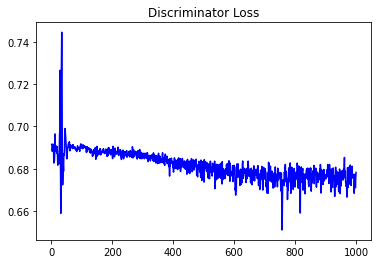

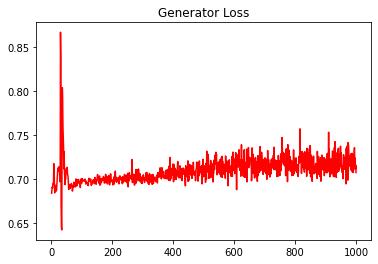

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.42135338158879876


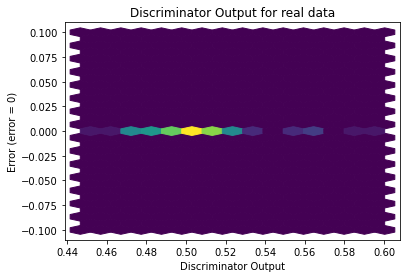

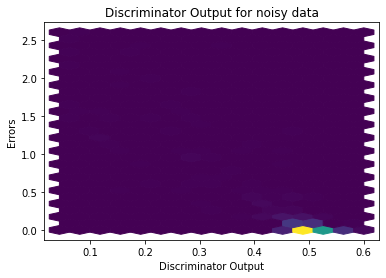

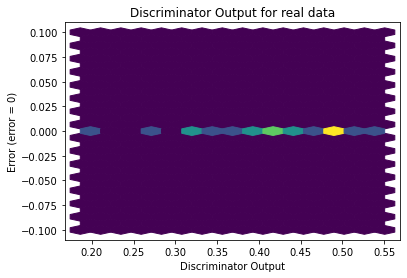

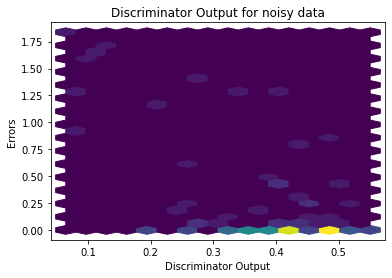

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7260]], requires_grad=True)
